# Correct decomposition
## by Siebesma & Cuijpers and Zhu

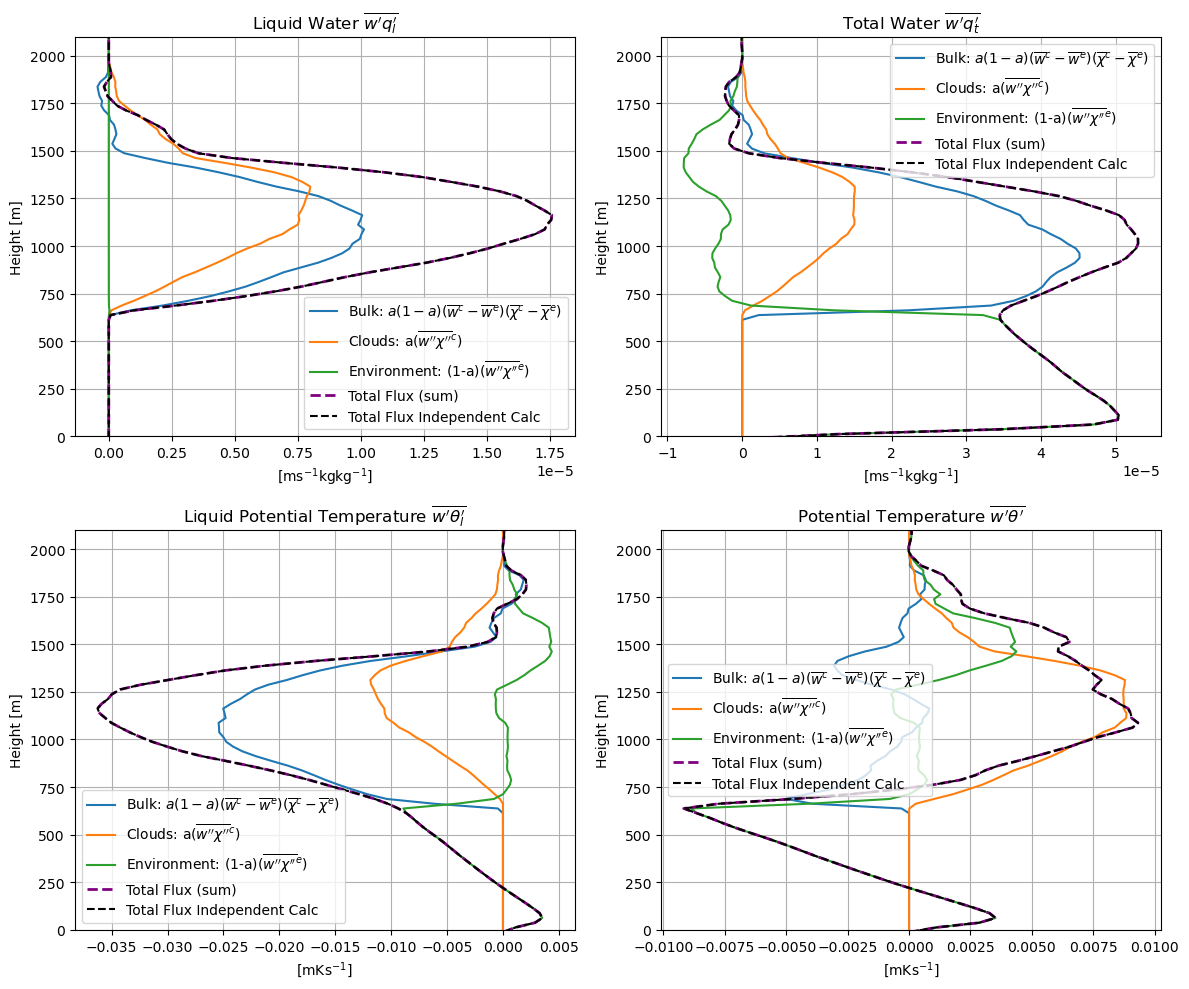

In [4]:
# import numpy as np
# import netCDF4 as nc
# import matplotlib.pyplot as plt

# liquid_water_threshold = 1e-5

# data_dir = '/Users/jure/PhD/coding/RICO_1hr/'

# files = {
#     'w': data_dir + 'rico.w.nc',
#     'l': data_dir + 'rico.l.nc',
#     'q': data_dir + 'rico.q.nc',
#     't': data_dir + 'rico.t.nc',
#     'p': data_dir + 'rico.p.nc',
#     'theta': data_dir + 'rico.potential_temp.nc'
# }

# var_names = {
#     'w': 'w',
#     'l': 'l',
#     'q': 'q',
#     't': 't',
#     'theta': 'potential_temperature'
# }

# def load_data(filename, var_name, timestep):
#     with nc.Dataset(filename) as ds:
#         return ds[var_name][timestep].astype(np.float64)

# def load_zt(filename):
#     with nc.Dataset(filename) as ds:
#         return ds['zt'][:]

# def calculate_fluxes(w_data, l_data, var_data):
#     bulk_flux = []
#     cloudy_flux = [] 
#     env_flux = []
#     total_flux = []

#     # Loop over vertical levels
#     for z in range(w_data.shape[0]):
#         # Initialize variables
#         w_cloudy_mean = 0
#         var_cloudy_mean = 0
#         w_env_mean = 0
#         var_env_mean = 0
#         bulk_level_flux = 0
#         cloudy_level_flux = 0
#         env_level_flux = 0
#         total_level_flux = 0
        
#         # Area fraction
#         cloudy = l_data[z] > liquid_water_threshold
#         environment = ~cloudy
#         a = np.mean(cloudy)

#         # Means
#         w_domain_mean = np.mean(w_data[z])
#         var_domain_mean = np.mean(var_data[z])
        
#         # Cloudy flux
#         if np.any(cloudy):
#             w_cloudy_mean = np.mean(w_data[z][cloudy])
#             var_cloudy_mean = np.mean(var_data[z][cloudy])
#             cloudy_level_flux = a * np.mean((w_data[z][cloudy] - w_cloudy_mean) * (var_data[z][cloudy] - var_cloudy_mean))

#         # Environment flux
#         if np.any(environment):
#             w_env_mean = np.mean(w_data[z][environment])
#             var_env_mean = np.mean(var_data[z][environment])
#             env_level_flux = (1 - a) * np.mean((w_data[z][environment] - w_env_mean) * (var_data[z][environment] - var_env_mean))

#         # Bulk flux
#         bulk_level_flux = a * (1 - a) * (w_cloudy_mean - w_env_mean) * (var_cloudy_mean - var_env_mean)

#         # Total flux
#         total_level_flux = np.sum([bulk_level_flux, cloudy_level_flux, env_level_flux])

#         # Append
#         bulk_flux.append(bulk_level_flux)
#         cloudy_flux.append(cloudy_level_flux)
#         env_flux.append(env_level_flux)
#         total_flux.append(total_level_flux)
        
#     return (np.array(bulk_flux), np.array(cloudy_flux), np.array(env_flux), np.array(total_flux))



# def average_over_time(start, end, var_key):
#     num_steps = end - start
#     total_sum = None

#     for t in range(start, end):
#         w_data = load_data(files['w'], var_names['w'], t)
#         l_data = load_data(files['l'], var_names['l'], t)
#         var_data = load_data(files[var_key], var_names[var_key], t)

#         results = calculate_fluxes(w_data, l_data, var_data)

#         if total_sum is None:
#             total_sum = [np.zeros_like(r) for r in results]

#         for i, r in enumerate(results):
#             total_sum[i] += r

#     # Average over time
#     return [r / num_steps for r in total_sum]

# def calculate_total_flux_independent(var_data, w_data):
#     independent_flux = []
#     for z in range(var_data.shape[0]):
#         # Domain means at this level
#         var_domain_mean = np.mean(var_data[z])
#         w_domain_mean = np.mean(w_data[z])

#         # Calculate differences from domain means
#         var_prime = var_data[z] - var_domain_mean
#         w_prime = w_data[z] - w_domain_mean

#         # Compute the product and take the mean over the grid
#         total_flux_indep = np.mean(var_prime * w_prime)
#         independent_flux.append(total_flux_indep)

#     return np.array(independent_flux)

# # Time range
# start_timestep = 13
# end_timestep = 14

# # Load height values
# zt_values = load_zt(files['l'])

# # Variables to process with their titles
# variables = {
#     'l': r'Liquid Water $\overline{w^{\prime}q_l^{\prime}}$',
#     'q': r'Total Water $\overline{w^{\prime}q_t^{\prime}}$',
#     't': r'Liquid Potential Temperature $\overline{w^{\prime}\theta_l^{\prime}}$',
#     'theta': r'Potential Temperature $\overline{w^{\prime}\theta^{\prime}}$'
# }

# # Store results
# results = {}

# for var_key, title in variables.items():
#     results[var_key] = {}
#     bulk_flux, cloudy_flux, env_flux, total_flux = average_over_time(start_timestep, end_timestep, var_key)
#     results[var_key]['bulk_flux'] = bulk_flux
#     results[var_key]['cloudy_flux'] = cloudy_flux
#     results[var_key]['env_flux'] = env_flux
#     results[var_key]['total_flux'] = total_flux
#     results[var_key]['title'] = title

#     # Calculate independent total flux
#     total_flux_independent_all_timesteps = []
#     for t in range(start_timestep, end_timestep):
#         var_data = load_data(files[var_key], var_names[var_key], t)
#         w_data = load_data(files['w'], var_names['w'], t)
#         total_flux_independent_all_timesteps.append(calculate_total_flux_independent(var_data, w_data))

#     # Average over timesteps
#     results[var_key]['total_flux_independent_calc'] = np.mean(total_flux_independent_all_timesteps, axis=0)

# # Plotting
# xlabels = {
#     'l': '[ms$^{-1}$kgkg$^{-1}$]',
#     'q': '[ms$^{-1}$kgkg$^{-1}$]',
#     't': '[mKs$^{-1}$]',
#     'theta': '[mKs$^{-1}$]'
# }

# fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# axs = axs.flatten()

# for ax, (var_key, res) in zip(axs, results.items()):
#     ax.plot(res['bulk_flux'], zt_values, c='C0', label='Bulk: $a(1-a)(\overline{w}^c - \overline{w}^e)(\overline{\chi}^c - \overline{\chi}^e)$')
#     ax.plot(res['cloudy_flux'], zt_values, c='C1', label='Clouds: a($\\overline{w\'\' \\chi\'\'}^c$)')
#     ax.plot(res['env_flux'], zt_values, color='C2', label='Environment: (1-a)($\\overline{w\'\'\\chi\'\'}^e$)')
#     ax.plot(res['total_flux'], zt_values, color='purple', label='Total Flux (sum)', linewidth = 2, linestyle='--' )
#     #ax.plot(res['total_flux_independent_calc'], zt_values, linestyle='--', color='black', label='Total Flux Independent Calc')
     
#     ax.set_xlabel(xlabels[var_key])
#     ax.set_ylabel('Height [m]')
#     ax.set_title(res['title'])
#     ax.grid(True)
#     ax.set_ylim([0, 2100])
#     ax.legend()

# # fig.savefig('three_part_decomposition.pdf', format='pdf', bbox_inches='tight')
# plt.tight_layout()
# plt.show()


# Correct decomposition
## by Gu et al

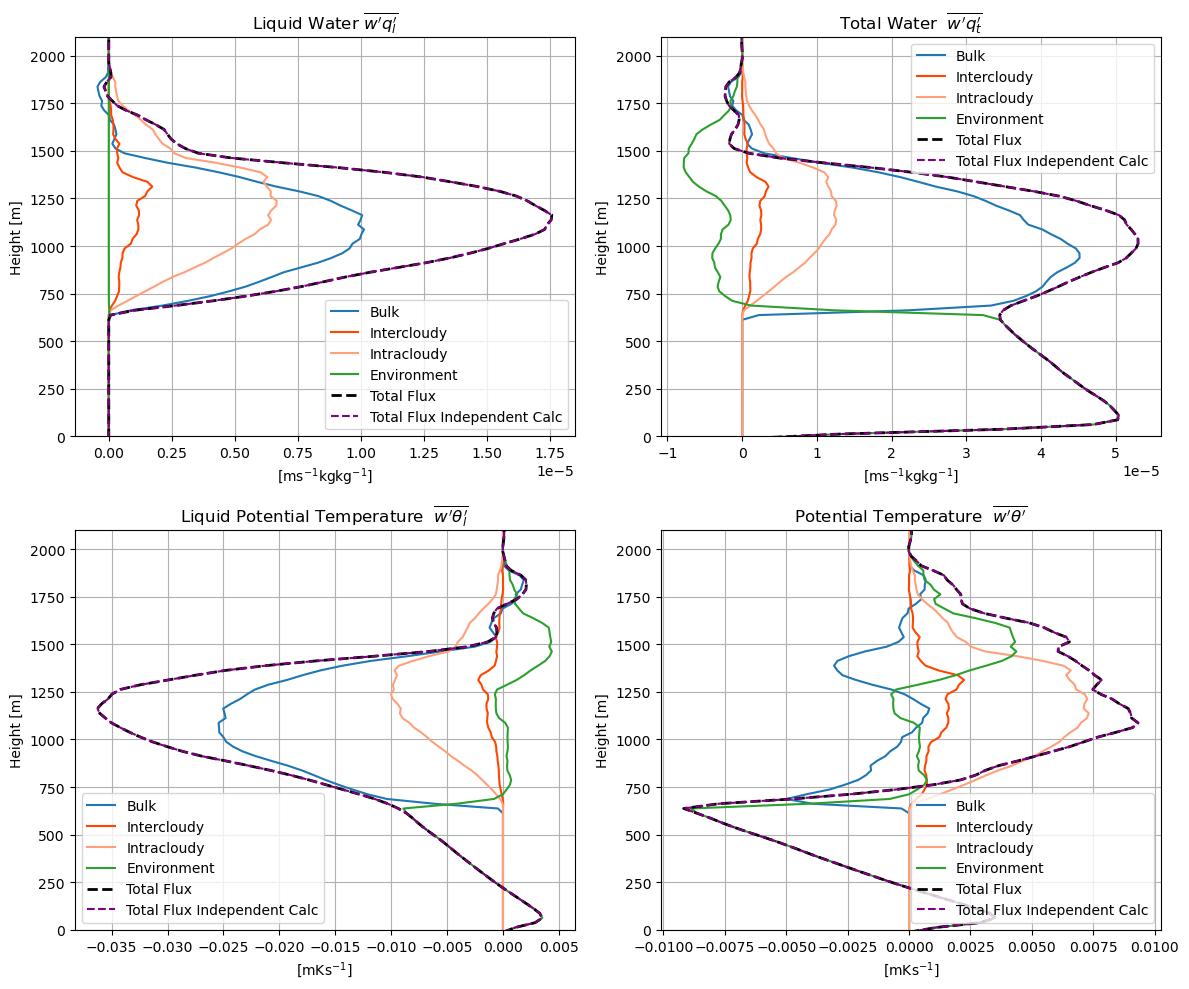

In [6]:
# import numpy as np
# import netCDF4 as nc
# import matplotlib.pyplot as plt
# from scipy.ndimage import label  # Added import

# liquid_water_threshold = 1e-5

# data_dir = '/Users/jure/PhD/coding/RICO_1hr/'

# files = {
#     'w': data_dir + 'rico.w.nc',
#     'l': data_dir + 'rico.l.nc',
#     'q': data_dir + 'rico.q.nc',
#     't': data_dir + 'rico.t.nc',
#     'p': data_dir + 'rico.p.nc',
#     'theta': data_dir + 'rico.potential_temp.nc'
# }

# var_names = {
#     'w': 'w',
#     'l': 'l',
#     'q': 'q',
#     't': 't',
#     'theta': 'potential_temperature'
# }

# def load_data(filename, var_name, timestep):
#     with nc.Dataset(filename) as ds:
#         return ds[var_name][timestep].astype(np.float64)

# def load_zt(filename):
#     with nc.Dataset(filename) as ds:
#         return ds['zt'][:]

# def calculate_fluxes(w_data, l_data, var_data):
#     bulk_flux = []
#     cloudy_flux = [] 
#     env_flux = []
#     intercloudy_flux = []  # Modified
#     intracloudy_flux = []  # Modified
#     total_flux = []

#     # Loop over vertical levels
#     for z in range(w_data.shape[0]):
#         # Initialize variables
#         w_cloudy_mean = 0
#         var_cloudy_mean = 0
#         w_env_mean = 0
#         var_env_mean = 0
        
#         bulk_level_flux = 0
#         cloudy_level_flux = 0
#         env_level_flux = 0
#         intercloudy_flux_level = 0  # Modified
#         intracloudy_flux_level = 0  # Modified
#         total_level_flux = 0
        
#         # Area fraction
#         cloudy = l_data[z] > liquid_water_threshold
#         environment = ~cloudy
#         a = np.mean(cloudy)

#         # Means
#         w_domain_mean = np.mean(w_data[z])
#         var_domain_mean = np.mean(var_data[z])
        
#         # Cloudy flux
#         if np.any(cloudy):
#             w_cloudy_mean = np.mean(w_data[z][cloudy])
#             var_cloudy_mean = np.mean(var_data[z][cloudy])
#             cloudy_level_flux = a * np.mean((w_data[z][cloudy] - w_cloudy_mean) * (var_data[z][cloudy] - var_cloudy_mean))

#             # Label connected components (objects) in the cloudy mask
#             structure = np.array([[0,1,0],
#                                   [1,1,1],
#                                   [0,1,0]])  # 4-connectivity
#             labeled_array, num_features = label(cloudy, structure=structure)

#             if num_features > 0:
#                 # Initialize lists to store means over objects and area fractions
#                 w_object_means = []
#                 var_object_means = []
#                 a_i_list = []

#                 # Total number of cloudy points at level z
#                 total_cloudy_points = np.sum(cloudy)
#                 total_points = cloudy.size  # Total number of grid points at level z

#                 # Compute means over each object and area fractions
#                 for i in range(1, num_features + 1):
#                     # Mask for object i
#                     object_i_mask = labeled_array == i

#                     # Area fraction of object i (relative to total grid area)
#                     a_i = np.sum(object_i_mask) / total_points

#                     # Mean over object i for w and var
#                     w_object_mean_i = np.mean(w_data[z][object_i_mask])
#                     var_object_mean_i = np.mean(var_data[z][object_i_mask])

#                     w_object_means.append(w_object_mean_i)
#                     var_object_means.append(var_object_mean_i)
#                     a_i_list.append(a_i)

#                 # Convert lists to arrays
#                 w_object_means = np.array(w_object_means)
#                 var_object_means = np.array(var_object_means)
#                 a_i_list = np.array(a_i_list)

#                 # Compute area-weighted average over all objects
#                 w_objects_mean = np.sum(a_i_list * w_object_means) / np.sum(a_i_list)
#                 var_objects_mean = np.sum(a_i_list * var_object_means) / np.sum(a_i_list)

#                 # Intercloudy flux calculation (sum over objects)
#                 intercloudy_flux_level = np.sum(
#                     a_i_list * (w_object_means - w_objects_mean) * (var_object_means - var_objects_mean)
#                 )

#                 # Intracloudy flux calculation (sum over objects)
#                 intracloudy_flux_level = 0
#                 for i in range(1, num_features + 1):
#                     object_i_mask = labeled_array == i

#                     # Area fraction of object i (relative to total grid area)
#                     a_i = np.sum(object_i_mask) / total_points

#                     # Deviations from object means
#                     w_prime_i = w_data[z][object_i_mask] - w_object_means[i - 1]
#                     var_prime_i = var_data[z][object_i_mask] - var_object_means[i - 1]

#                     # Compute intracloudy flux for object i
#                     intracloudy_flux_i = np.mean(w_prime_i * var_prime_i)

#                     # Multiply by area fraction
#                     intracloudy_flux_level += a_i * intracloudy_flux_i
#             else:
#                 # No objects found
#                 intercloudy_flux_level = 0
#                 intracloudy_flux_level = 0
#         else:
#             # No cloudy points
#             intercloudy_flux_level = 0
#             intracloudy_flux_level = 0

#         # Environment flux
#         if np.any(environment):
#             w_env_mean = np.mean(w_data[z][environment])
#             var_env_mean = np.mean(var_data[z][environment])
#             env_level_flux = (1 - a) * np.mean(
#                 (w_data[z][environment] - w_env_mean) * (var_data[z][environment] - var_env_mean)
#             )

#         # Bulk flux
#         bulk_level_flux = a * (1 - a) * (
#             (w_cloudy_mean - w_env_mean) * (var_cloudy_mean - var_env_mean)
#         )
        
        
#         # Total flux
#         total_level_flux = np.sum([
#             bulk_level_flux,
#             #cloudy_level_flux,
#             env_level_flux,
#             intercloudy_flux_level,
#             intracloudy_flux_level
#         ])
        
       
#         # Append fluxes
#         bulk_flux.append(bulk_level_flux)
#         cloudy_flux.append(cloudy_level_flux)
#         env_flux.append(env_level_flux)
#         intercloudy_flux.append(intercloudy_flux_level)
#         intracloudy_flux.append(intracloudy_flux_level)
#         total_flux.append(total_level_flux)
        
#     return (
#         np.array(bulk_flux),
#         np.array(cloudy_flux),
#         np.array(env_flux),
#         np.array(intercloudy_flux),
#         np.array(intracloudy_flux),
#         np.array(total_flux)
#     )

# def average_over_time(start, end, var_key):
#     num_steps = end - start
#     total_sum = None

#     for t in range(start, end):
#         w_data = load_data(files['w'], var_names['w'], t)
#         l_data = load_data(files['l'], var_names['l'], t)
#         var_data = load_data(files[var_key], var_names[var_key], t)

#         results = calculate_fluxes(w_data, l_data, var_data)

#         if total_sum is None:
#             total_sum = [np.zeros_like(r) for r in results]

#         for i, r in enumerate(results):
#             total_sum[i] += r

#     # Average over time
#     return [r / num_steps for r in total_sum]

# def calculate_total_flux_independent(var_data, w_data):
#     independent_flux = []
#     for z in range(var_data.shape[0]):
#         # Domain means at this level
#         var_domain_mean = np.mean(var_data[z])
#         w_domain_mean = np.mean(w_data[z])

#         # Calculate differences from domain means
#         var_prime = var_data[z] - var_domain_mean
#         w_prime = w_data[z] - w_domain_mean

#         # Compute the product and take the mean over the grid
#         total_flux_indep = np.mean(var_prime * w_prime)
#         independent_flux.append(total_flux_indep)

#     return np.array(independent_flux)

# # Time range
# start_timestep = 13
# end_timestep = 14

# # Load height values
# zt_values = load_zt(files['l'])

# # Variables to process with their titles
# variables = {
#     'l': r'Liquid Water $\overline{w^{\prime}q_l^{\prime}}$',
#     'q': r'Total Water  $\overline{w^{\prime}q_t^{\prime}}$',
#     't': r'Liquid Potential Temperature  $\overline{w^{\prime}\theta_l^{\prime}}$',
#     'theta': r'Potential Temperature  $\overline{w^{\prime}\theta^{\prime}}$'
# }

# # Store results
# results = {}

# for var_key, title in variables.items():
#     results[var_key] = {}
#     (bulk_flux, cloudy_flux, env_flux,
#      intercloudy_flux, intracloudy_flux, total_flux) = average_over_time(start_timestep, end_timestep, var_key)
    
#     results[var_key]['bulk_flux'] = bulk_flux
#     results[var_key]['cloudy_flux'] = cloudy_flux
#     results[var_key]['env_flux'] = env_flux
#     results[var_key]['intercloudy_flux'] = intercloudy_flux
#     results[var_key]['intracloudy_flux'] = intracloudy_flux
#     results[var_key]['total_flux'] = total_flux
#     results[var_key]['title'] = title

#     # Calculate independent total flux
#     total_flux_independent_all_timesteps = []
#     for t in range(start_timestep, end_timestep):
#         var_data = load_data(files[var_key], var_names[var_key], t)
#         w_data = load_data(files['w'], var_names['w'], t)
#         total_flux_independent_all_timesteps.append(
#             calculate_total_flux_independent(var_data, w_data)
#         )

#     # Average over timesteps
#     results[var_key]['total_flux_independent_calc'] = np.mean(
#         total_flux_independent_all_timesteps, axis=0
#     )

# # Plotting
# xlabels = {
#     'l': '[ms$^{-1}$kgkg$^{-1}$]',
#     'q': '[ms$^{-1}$kgkg$^{-1}$]',
#     't': '[mKs$^{-1}$]',
#     'theta': '[mKs$^{-1}$]'
# }

# fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# axs = axs.flatten()

# for ax, (var_key, res) in zip(axs, results.items()):
#     ax.plot(res['bulk_flux'], zt_values, c='C0', label='Bulk')
#     #ax.plot(res['cloudy_flux'], zt_values, c='C1', label='Cloudy (intra+inter)', linestyle = '--', linewidth=0.75)
#     ax.plot(res['intercloudy_flux'], zt_values, label='Intercloudy', c='orangered')
#     ax.plot(res['intracloudy_flux'], zt_values, label='Intracloudy', c='lightsalmon')
#     ax.plot(res['env_flux'], zt_values, label='Environment', c='C2')
#     #ax.plot(res['total_flux'], zt_values, label='Total Flux (sum)', c='black', linewidth = 2, linestyle = '--')
#     ax.plot(res['total_flux_independent_calc'], zt_values, linestyle='--', color='purple', label='Total Flux (independent)')

#     ax.set_xlabel(xlabels[var_key])
#     ax.set_ylabel('Height [m]')
#     ax.set_title(res['title'])
#     ax.grid(True)
#     ax.set_ylim([0, 2100])
#     ax.legend()

# #fig.savefig('both_decomposition.pdf', format='pdf', bbox_inches='tight')
# plt.tight_layout()
# plt.show()

# Adding buoyancy as a criterion

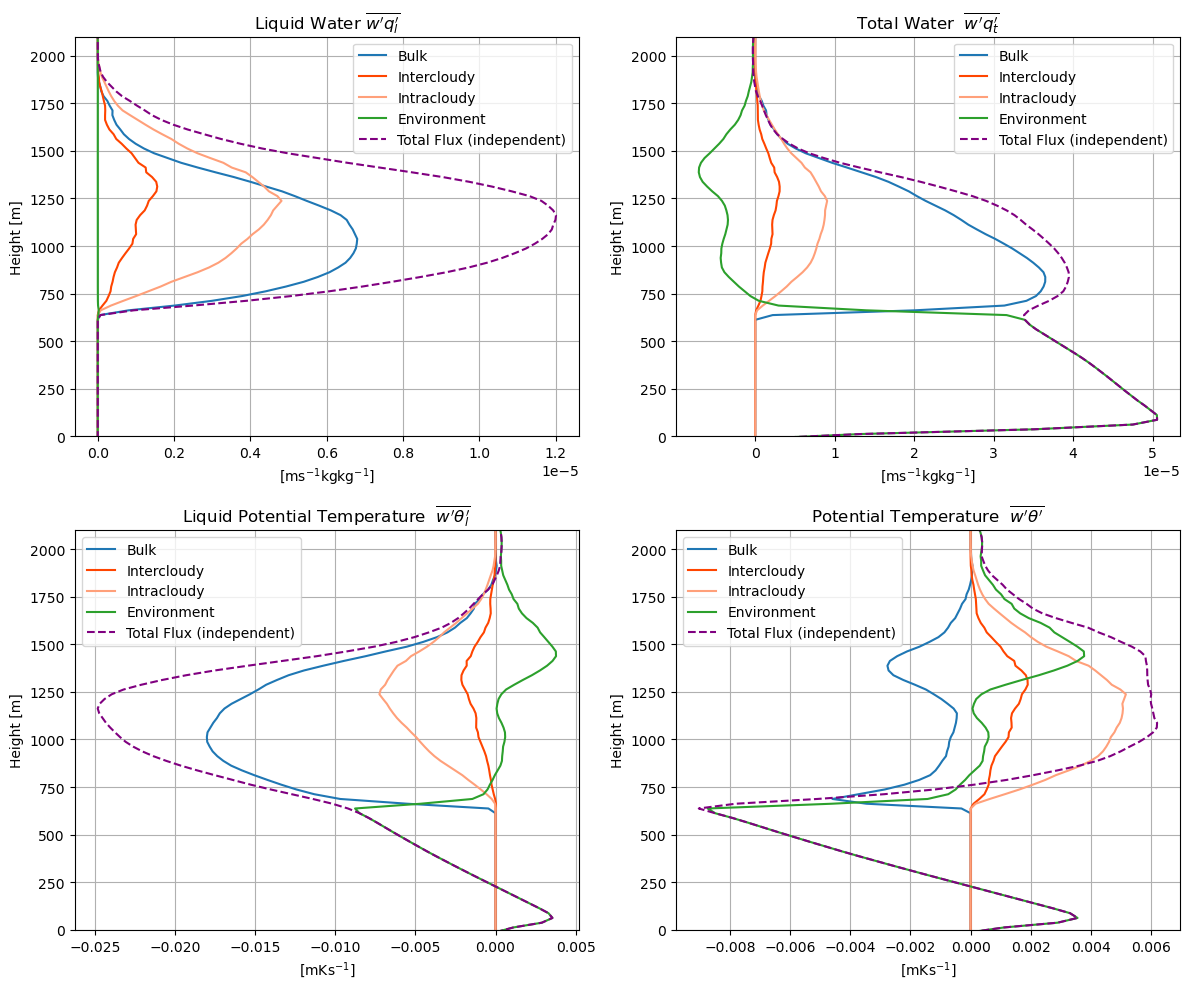

In [17]:
# import numpy as np
# import netCDF4 as nc
# import matplotlib.pyplot as plt
# from scipy.ndimage import label  # Added import

# liquid_water_threshold = 1e-5

# data_dir = '/Users/jure/PhD/coding/RICO_1hr/'

# files = {
#     'w': data_dir + 'rico.w.nc',
#     'l': data_dir + 'rico.l.nc',
#     'q': data_dir + 'rico.q.nc',
#     't': data_dir + 'rico.t.nc',
#     'p': data_dir + 'rico.p.nc',
#     'theta': data_dir + 'rico.potential_temp.nc'
# }

# var_names = {
#     'w': 'w',
#     'l': 'l',
#     'q': 'q',
#     't': 't',
#     'theta': 'potential_temperature'
# }

# def load_data(filename, var_name, timestep):
#     with nc.Dataset(filename) as ds:
#         return ds[var_name][timestep].astype(np.float64)

# def load_zt(filename):
#     with nc.Dataset(filename) as ds:
#         return ds['zt'][:]

# def calculate_fluxes(w_data, l_data, var_data):
#     bulk_flux = []
#     cloudy_flux = [] 
#     env_flux = []
#     intercloudy_flux = []  # Modified
#     intracloudy_flux = []  # Modified
#     total_flux = []

#     # Loop over vertical levels
#     for z in range(w_data.shape[0]):
#         # Initialize variables
#         w_cloudy_mean = 0
#         var_cloudy_mean = 0
#         w_env_mean = 0
#         var_env_mean = 0
        
#         bulk_level_flux = 0
#         cloudy_level_flux = 0
#         env_level_flux = 0
#         intercloudy_flux_level = 0  # Modified
#         intracloudy_flux_level = 0  # Modified
#         total_level_flux = 0
        
#         # Area fraction
#         cloudy = l_data[z] > liquid_water_threshold
#         environment = ~cloudy
#         a = np.mean(cloudy)

#         # Means
#         w_domain_mean = np.mean(w_data[z])
#         var_domain_mean = np.mean(var_data[z])
        
#         # Cloudy flux
#         if np.any(cloudy):
#             w_cloudy_mean = np.mean(w_data[z][cloudy])
#             var_cloudy_mean = np.mean(var_data[z][cloudy])
#             cloudy_level_flux = a * np.mean((w_data[z][cloudy] - w_cloudy_mean) * (var_data[z][cloudy] - var_cloudy_mean))

#             # Label connected components (objects) in the cloudy mask
#             structure = np.array([[0,1,0],
#                                   [1,1,1],
#                                   [0,1,0]])  # 4-connectivity
#             labeled_array, num_features = label(cloudy, structure=structure)

#             if num_features > 0:
#                 # Initialize lists to store means over objects and area fractions
#                 w_object_means = []
#                 var_object_means = []
#                 a_i_list = []

#                 # Total number of cloudy points at level z
#                 total_cloudy_points = np.sum(cloudy)
#                 total_points = cloudy.size  # Total number of grid points at level z

#                 # Compute means over each object and area fractions
#                 for i in range(1, num_features + 1):
#                     # Mask for object i
#                     object_i_mask = labeled_array == i

#                     # Area fraction of object i (relative to total grid area)
#                     a_i = np.sum(object_i_mask) / total_points

#                     # Mean over object i for w and var
#                     w_object_mean_i = np.mean(w_data[z][object_i_mask])
#                     var_object_mean_i = np.mean(var_data[z][object_i_mask])

#                     w_object_means.append(w_object_mean_i)
#                     var_object_means.append(var_object_mean_i)
#                     a_i_list.append(a_i)

#                 # Convert lists to arrays
#                 w_object_means = np.array(w_object_means)
#                 var_object_means = np.array(var_object_means)
#                 a_i_list = np.array(a_i_list)

#                 # Compute area-weighted average over all objects
#                 w_objects_mean = np.sum(a_i_list * w_object_means) / np.sum(a_i_list)
#                 var_objects_mean = np.sum(a_i_list * var_object_means) / np.sum(a_i_list)

#                 # Intercloudy flux calculation (sum over objects)
#                 intercloudy_flux_level = np.sum(
#                     a_i_list * (w_object_means - w_objects_mean) * (var_object_means - var_objects_mean)
#                 )

#                 # Intracloudy flux calculation (sum over objects)
#                 intracloudy_flux_level = 0
#                 for i in range(1, num_features + 1):
#                     object_i_mask = labeled_array == i

#                     # Area fraction of object i (relative to total grid area)
#                     a_i = np.sum(object_i_mask) / total_points

#                     # Deviations from object means
#                     w_prime_i = w_data[z][object_i_mask] - w_object_means[i - 1]
#                     var_prime_i = var_data[z][object_i_mask] - var_object_means[i - 1]

#                     # Compute intracloudy flux for object i
#                     intracloudy_flux_i = np.mean(w_prime_i * var_prime_i)

#                     # Multiply by area fraction
#                     intracloudy_flux_level += a_i * intracloudy_flux_i
#             else:
#                 # No objects found
#                 intercloudy_flux_level = 0
#                 intracloudy_flux_level = 0
#         else:
#             # No cloudy points
#             intercloudy_flux_level = 0
#             intracloudy_flux_level = 0

#         # Environment flux
#         if np.any(environment):
#             w_env_mean = np.mean(w_data[z][environment])
#             var_env_mean = np.mean(var_data[z][environment])
#             env_level_flux = (1 - a) * np.mean(
#                 (w_data[z][environment] - w_env_mean) * (var_data[z][environment] - var_env_mean)
#             )

#         # Bulk flux
#         bulk_level_flux = a * (1 - a) * (
#             (w_cloudy_mean - w_env_mean) * (var_cloudy_mean - var_env_mean)
#         )
        
        
#         # Total flux
#         total_level_flux = np.sum([
#             bulk_level_flux,
#             #cloudy_level_flux,
#             env_level_flux,
#             intercloudy_flux_level,
#             intracloudy_flux_level
#         ])
        
       
#         # Append fluxes
#         bulk_flux.append(bulk_level_flux)
#         cloudy_flux.append(cloudy_level_flux)
#         env_flux.append(env_level_flux)
#         intercloudy_flux.append(intercloudy_flux_level)
#         intracloudy_flux.append(intracloudy_flux_level)
#         total_flux.append(total_level_flux)
        
#     return (
#         np.array(bulk_flux),
#         np.array(cloudy_flux),
#         np.array(env_flux),
#         np.array(intercloudy_flux),
#         np.array(intracloudy_flux),
#         np.array(total_flux)
#     )

# def average_over_time(start, end, var_key):
#     num_steps = end - start
#     total_sum = None

#     for t in range(start, end):
#         w_data = load_data(files['w'], var_names['w'], t)
#         l_data = load_data(files['l'], var_names['l'], t)
#         var_data = load_data(files[var_key], var_names[var_key], t)

#         results = calculate_fluxes(w_data, l_data, var_data)

#         if total_sum is None:
#             total_sum = [np.zeros_like(r) for r in results]

#         for i, r in enumerate(results):
#             total_sum[i] += r

#     # Average over time
#     return [r / num_steps for r in total_sum]

# def calculate_total_flux_independent(var_data, w_data):
#     independent_flux = []
#     for z in range(var_data.shape[0]):
#         # Domain means at this level
#         var_domain_mean = np.mean(var_data[z])
#         w_domain_mean = np.mean(w_data[z])

#         # Calculate differences from domain means
#         var_prime = var_data[z] - var_domain_mean
#         w_prime = w_data[z] - w_domain_mean

#         # Compute the product and take the mean over the grid
#         total_flux_indep = np.mean(var_prime * w_prime)
#         independent_flux.append(total_flux_indep)

#     return np.array(independent_flux)

# # Time range
# start_timestep = 4
# end_timestep = 14

# # Load height values
# zt_values = load_zt(files['l'])

# # Variables to process with their titles
# variables = {
#     'l': r'Liquid Water $\overline{w^{\prime}q_l^{\prime}}$',
#     'q': r'Total Water  $\overline{w^{\prime}q_t^{\prime}}$',
#     't': r'Liquid Potential Temperature  $\overline{w^{\prime}\theta_l^{\prime}}$',
#     'theta': r'Potential Temperature  $\overline{w^{\prime}\theta^{\prime}}$'
# }

# # Store results
# results = {}

# for var_key, title in variables.items():
#     results[var_key] = {}
#     (bulk_flux, cloudy_flux, env_flux,
#      intercloudy_flux, intracloudy_flux, total_flux) = average_over_time(start_timestep, end_timestep, var_key)
    
#     results[var_key]['bulk_flux'] = bulk_flux
#     results[var_key]['cloudy_flux'] = cloudy_flux
#     results[var_key]['env_flux'] = env_flux
#     results[var_key]['intercloudy_flux'] = intercloudy_flux
#     results[var_key]['intracloudy_flux'] = intracloudy_flux
#     results[var_key]['total_flux'] = total_flux
#     results[var_key]['title'] = title

#     # Calculate independent total flux
#     total_flux_independent_all_timesteps = []
#     for t in range(start_timestep, end_timestep):
#         var_data = load_data(files[var_key], var_names[var_key], t)
#         w_data = load_data(files['w'], var_names['w'], t)
#         total_flux_independent_all_timesteps.append(
#             calculate_total_flux_independent(var_data, w_data)
#         )

#     # Average over timesteps
#     results[var_key]['total_flux_independent_calc'] = np.mean(
#         total_flux_independent_all_timesteps, axis=0
#     )

# # Plotting
# xlabels = {
#     'l': '[ms$^{-1}$kgkg$^{-1}$]',
#     'q': '[ms$^{-1}$kgkg$^{-1}$]',
#     't': '[mKs$^{-1}$]',
#     'theta': '[mKs$^{-1}$]'
# }

# fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# axs = axs.flatten()

# for ax, (var_key, res) in zip(axs, results.items()):
#     ax.plot(res['bulk_flux'], zt_values, c='C0', label='Bulk')
#     #ax.plot(res['cloudy_flux'], zt_values, c='C1', label='Cloudy (intra+inter)', linestyle = '--', linewidth=0.75)
#     ax.plot(res['intercloudy_flux'], zt_values, label='Intercloudy', c='orangered')
#     ax.plot(res['intracloudy_flux'], zt_values, label='Intracloudy', c='lightsalmon')
#     ax.plot(res['env_flux'], zt_values, label='Environment', c='C2')
#     #ax.plot(res['total_flux'], zt_values, label='Total Flux (sum)', c='black', linewidth = 2, linestyle = '--')
#     ax.plot(res['total_flux_independent_calc'], zt_values, linestyle='--', color='purple', label='Total Flux (independent)')

#     ax.set_xlabel(xlabels[var_key])
#     ax.set_ylabel('Height [m]')
#     ax.set_title(res['title'])
#     ax.grid(True)
#     ax.set_ylim([0, 2100])
#     ax.legend()

# #fig.savefig('both_decomposition.pdf', format='pdf', bbox_inches='tight')
# plt.tight_layout()
# plt.show()

# What fraction of total flux is captured by the decomposed parts?

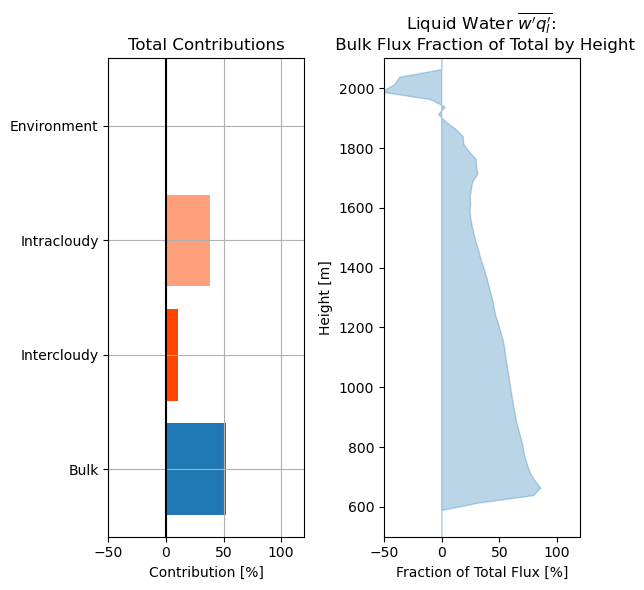

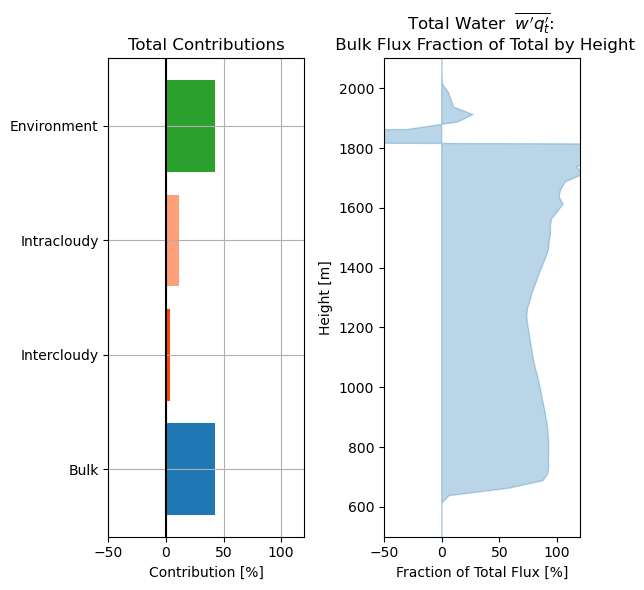

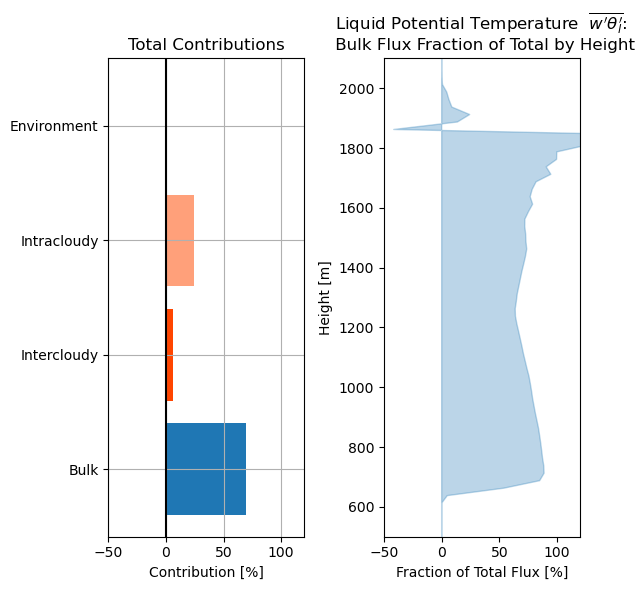

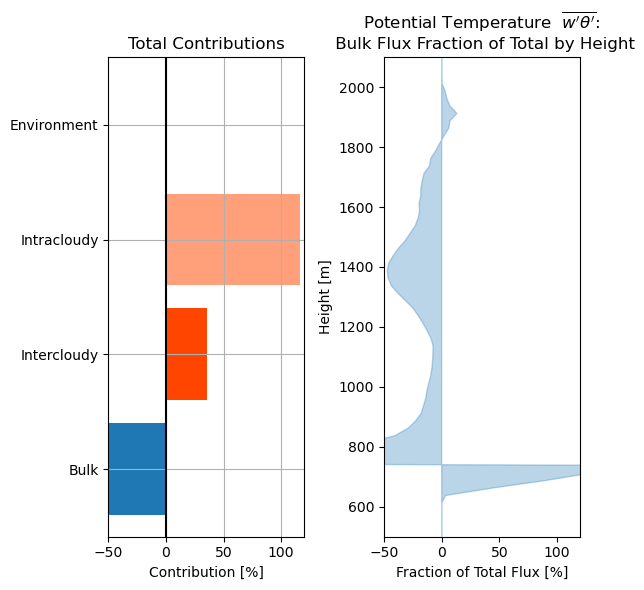

In [52]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Compute fractions and create plots
# for var_key, res in results.items():
#     # Extract necessary arrays
#     bulk_flux = res['bulk_flux']
#     intercloudy_flux = res['intercloudy_flux']
#     intracloudy_flux = res['intracloudy_flux']
#     env_flux = res['env_flux']
#     total_indep = res['total_flux_independent_calc']
#     zt_values = zt_values  # from your earlier code

#     # Avoid division by zero
#     nonzero_mask = (total_indep != 0.0)

#     # Compute fractions (as percentages)
#     bulk_fraction = np.zeros_like(total_indep)
#     bulk_intracloudy_fraction = np.zeros_like(total_indep)
#     bulk_intercloudy_fraction = np.zeros_like(total_indep)
#     bulk_intracloudy_intercloudy_fraction = np.zeros_like(total_indep)
#     bulk_intracloudy_intercloudy_env_fraction = np.zeros_like(total_indep)

#     bulk_fraction[nonzero_mask] = (bulk_flux[nonzero_mask] / total_indep[nonzero_mask]) * 100.0
#     bulk_intracloudy_fraction[nonzero_mask] = ((bulk_flux[nonzero_mask] + intracloudy_flux[nonzero_mask]) / total_indep[nonzero_mask]) * 100.0
#     bulk_intercloudy_fraction[nonzero_mask] = ((bulk_flux[nonzero_mask] + intercloudy_flux[nonzero_mask]) / total_indep[nonzero_mask]) * 100.0
#     bulk_intracloudy_intercloudy_fraction[nonzero_mask] = ((bulk_flux[nonzero_mask] + intracloudy_flux[nonzero_mask] + intercloudy_flux[nonzero_mask]) / total_indep[nonzero_mask]) * 100.0
#     bulk_intracloudy_intercloudy_env_fraction[nonzero_mask] = ((bulk_flux[nonzero_mask] + intracloudy_flux[nonzero_mask] + intercloudy_flux[nonzero_mask] + env_flux[nonzero_mask]) / total_indep[nonzero_mask]) * 100.0

#     # Compute overall fractions (integrated over all levels)
#     total_flux_sum = np.sum(total_indep)
#     bulk_overall = np.sum(bulk_flux) / total_flux_sum * 100.0 if total_flux_sum != 0 else 0.0
#     intercloudy_overall = np.sum(intercloudy_flux) / total_flux_sum * 100.0 if total_flux_sum != 0 else 0.0
#     intracloudy_overall = np.sum(intracloudy_flux) / total_flux_sum * 100.0 if total_flux_sum != 0 else 0.0
#     environment_overall = np.sum(env_flux) / total_flux_sum * 100.0 if total_flux_sum != 0 else 0.0

#     # Normalize contributions to ensure they add up to 100%
#     total_contribution = bulk_overall + intercloudy_overall + intracloudy_overall + environment_overall
#     bulk_overall = bulk_overall / total_contribution * 100
#     intercloudy_overall = intercloudy_overall / total_contribution * 100
#     intracloudy_overall = intracloudy_overall / total_contribution * 100
#     environment_overall = environment_overall / total_contribution * 100

#     # Create the dual plot: flux contributions + bar chart
#     fig, axs = plt.subplots(1, 2, figsize=(6, 6), gridspec_kw={'width_ratios': [1, 1]})

#     # Bar chart (on the left)
#     bar_labels = ['Bulk', 'Intercloudy', 'Intracloudy', 'Environment']
#     bar_values = [bulk_overall, intercloudy_overall, intracloudy_overall, environment_overall]
#     axs[0].axvline(x=0, color='black')
#     axs[0].barh(bar_labels, bar_values, color=['C0', 'orangered', 'lightsalmon', 'C2'])
#     axs[0].set_xlim([-50, 120])  # Plot on the negative side
#     axs[0].set_xlabel('Contribution [%]')
#     axs[0].set_title('Total Contributions')
#     axs[0].grid(True)

#     # Main flux plot (on the right)
#     axs[1].fill_betweenx(zt_values, 0, bulk_fraction, color='C0', alpha=0.3, label='Bulk fraction')
#     axs[1].set_xlim([-50, 120])
#     axs[1].set_ylim([500, 2100])
#     axs[1].set_xlabel('Fraction of Total Flux [%]')
#     axs[1].set_ylabel('Height [m]')
#     axs[1].set_title(f"{res['title']}: \n Bulk Flux Fraction of Total by Height")
#     # axs[1].grid(True)

#     plt.tight_layout()
#     #filename = f"{var_key}_flux_contributions.pdf"
#     #plt.savefig(filename, format='pdf', bbox_inches='tight')

#     plt.show()

## Restrict totals to 600m-2100m (liquid water only)

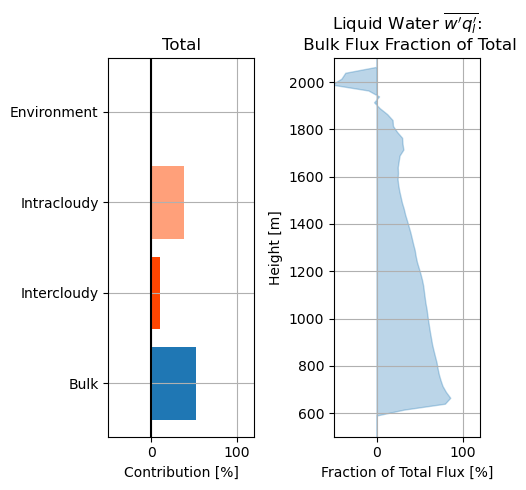

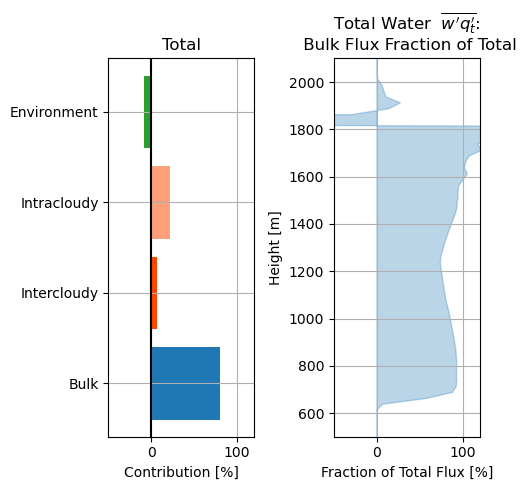

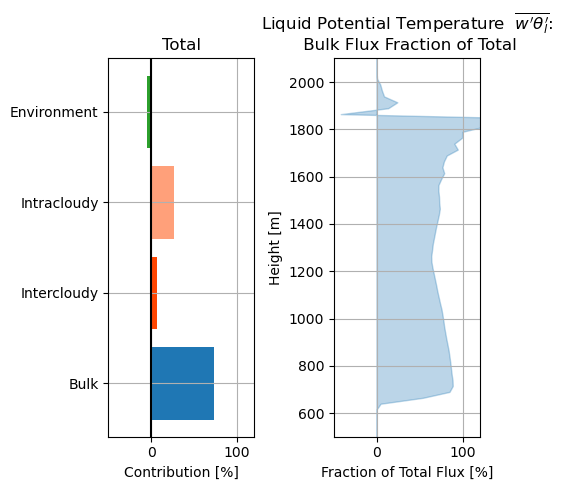

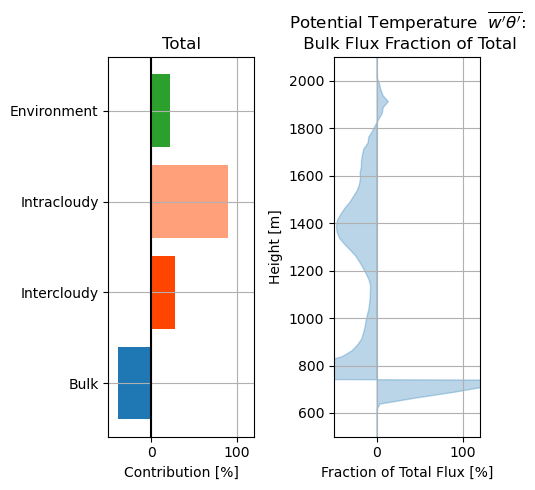

In [64]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Compute fractions and create plots
# for var_key, res in results.items():
#     # Extract necessary arrays
#     bulk_flux = res['bulk_flux']
#     intercloudy_flux = res['intercloudy_flux']
#     intracloudy_flux = res['intracloudy_flux']
#     env_flux = res['env_flux']
#     total_indep = res['total_flux_independent_calc']
#     zt_values = zt_values  # from your earlier code

#     # Define height range for liquid water (600 m to 2100 m)
#     liquid_water_mask = (zt_values >= 600) & (zt_values <= 2100)

#     # Avoid division by zero
#     nonzero_mask = (total_indep != 0.0)

#     # Compute fractions (as percentages) for the right plot (unchanged)
#     bulk_fraction = np.zeros_like(total_indep)
#     bulk_fraction[nonzero_mask] = (bulk_flux[nonzero_mask] / total_indep[nonzero_mask]) * 100.0

#     # Compute overall contributions (for the left plot) only within the liquid water range
#     total_flux_sum = np.sum(total_indep[liquid_water_mask])  # Sum only in the liquid water range
#     bulk_overall = np.sum(bulk_flux[liquid_water_mask]) / total_flux_sum * 100.0 if total_flux_sum != 0 else 0.0
#     intercloudy_overall = np.sum(intercloudy_flux[liquid_water_mask]) / total_flux_sum * 100.0 if total_flux_sum != 0 else 0.0
#     intracloudy_overall = np.sum(intracloudy_flux[liquid_water_mask]) / total_flux_sum * 100.0 if total_flux_sum != 0 else 0.0
#     environment_overall = np.sum(env_flux[liquid_water_mask]) / total_flux_sum * 100.0 if total_flux_sum != 0 else 0.0

#     # Normalize contributions to ensure they add up to 100%
#     total_contribution = bulk_overall + intercloudy_overall + intracloudy_overall + environment_overall
#     bulk_overall = bulk_overall / total_contribution * 100
#     intercloudy_overall = intercloudy_overall / total_contribution * 100
#     intracloudy_overall = intracloudy_overall / total_contribution * 100
#     environment_overall = environment_overall / total_contribution * 100

#     # Create the dual plot: flux contributions + bar chart
#     fig, axs = plt.subplots(1, 2, figsize=(5, 5), gridspec_kw={'width_ratios': [1, 1]})

#     # Bar chart (on the left)
#     bar_labels = ['Bulk', 'Intercloudy', 'Intracloudy', 'Environment']
#     bar_values = [bulk_overall, intercloudy_overall, intracloudy_overall, environment_overall]
#     axs[0].axvline(x=0, color='black')
#     axs[0].barh(bar_labels, bar_values, color=['C0', 'orangered', 'lightsalmon', 'C2'])
#     axs[0].set_xlim([-50, 120])  # Plot on the negative side
#     axs[0].set_xlabel('Contribution [%]')
#     axs[0].set_title('Total')
#     axs[0].grid(True)

#     # Main flux plot (on the right, unchanged)
#     axs[1].fill_betweenx(zt_values, 0, bulk_fraction, color='C0', alpha=0.3, label='Bulk fraction')
#     axs[1].set_xlim([-50, 120])
#     axs[1].set_ylim([500, 2100])
#     axs[1].set_xlabel('Fraction of Total Flux [%]')
#     axs[1].set_ylabel('Height [m]')
#     axs[1].set_title(f"{res['title']}:\n Bulk Flux Fraction of Total")
#     axs[1].grid(True)
#     plt.tight_layout()

#     # Save the figure as a PDF
#     #filename = f"{var_key}_flux_contributions_height_restricted.pdf"
#     #plt.savefig(filename, format='pdf', bbox_inches='tight')

#     plt.show()


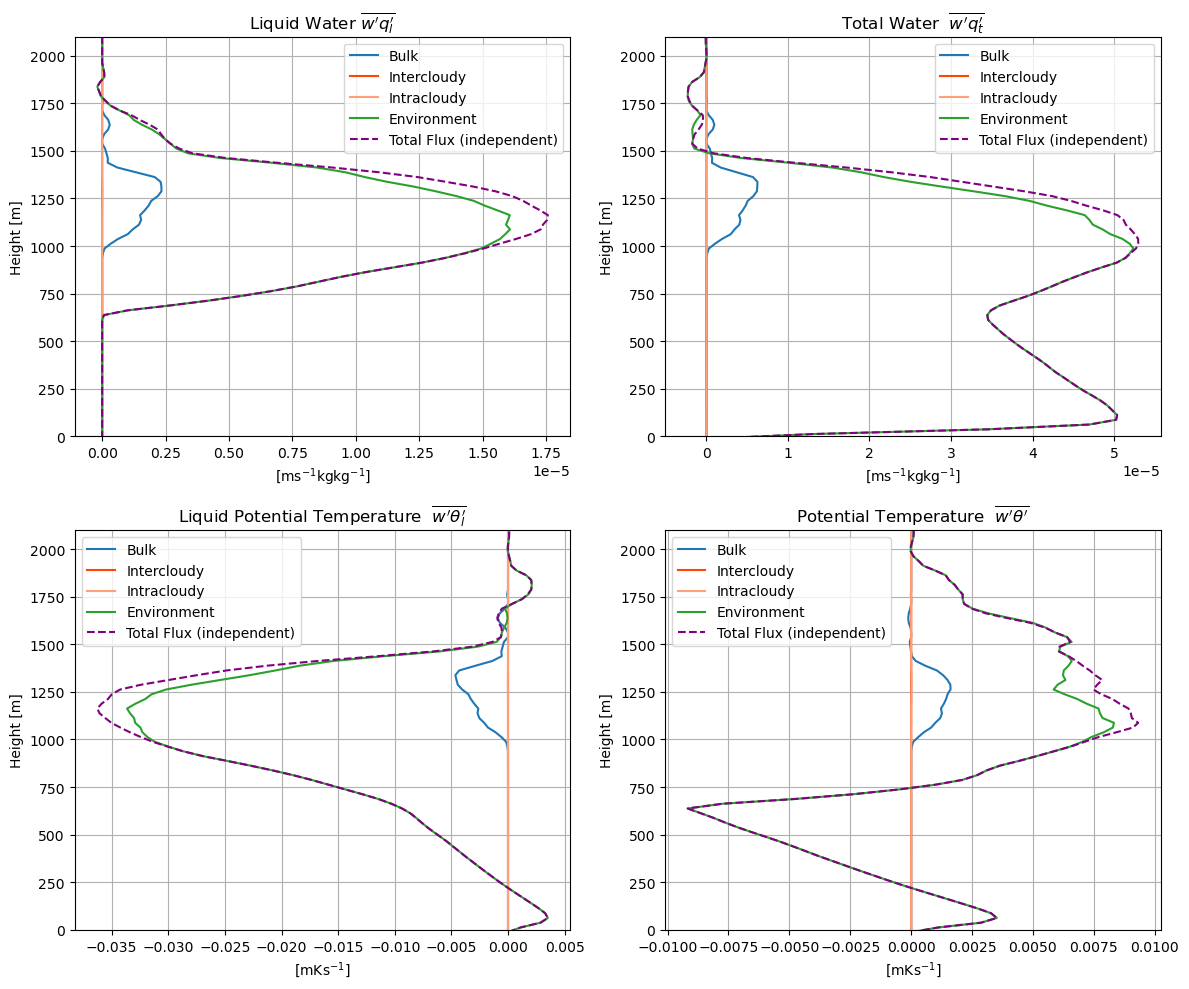

In [10]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import label

liquid_water_threshold = 1e-5  # Existing threshold for liquid water content
vertical_velocity_percentile = 99.5  # Percentile for vertical velocity threshold

data_dir = '/Users/jure/PhD/coding/RICO_1hr/'

files = {
    'w': data_dir + 'rico.w.nc',
    'l': data_dir + 'rico.l.nc',
    'q': data_dir + 'rico.q.nc',
    't': data_dir + 'rico.t.nc',
    'p': data_dir + 'rico.p.nc',
    'theta': data_dir + 'rico.potential_temp.nc'
}

var_names = {
    'w': 'w',
    'l': 'l',
    'q': 'q',
    't': 't',
    'theta': 'potential_temperature'
}

def load_data(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        return ds[var_name][timestep].astype(np.float64)

def load_zt(filename):
    with nc.Dataset(filename) as ds:
        return ds['zt'][:]

def compute_vertical_velocity_threshold(start_timestep, end_timestep):
    """
    Compute the vertical velocity threshold based on the top 0.5% of vertical velocities
    across all levels and timesteps where the liquid water content exceeds the threshold.
    """
    w_values_above_threshold = []

    for t in range(start_timestep, end_timestep):
        w_data = load_data(files['w'], var_names['w'], t)
        l_data = load_data(files['l'], var_names['l'], t)

        # Mask where liquid water content exceeds the threshold
        liquid_water_mask = l_data > liquid_water_threshold

        # Extract vertical velocities where the mask is True
        w_values = w_data[liquid_water_mask]
        w_values_above_threshold.extend(w_values)

    # Convert to numpy array
    w_values_above_threshold = np.array(w_values_above_threshold)

    # Compute the vertical velocity threshold (99.5th percentile)
    vertical_velocity_threshold = np.percentile(w_values_above_threshold, vertical_velocity_percentile)

    return vertical_velocity_threshold

def calculate_fluxes(w_data, l_data, var_data, vertical_velocity_threshold):
    bulk_flux = []
    cloudy_flux = [] 
    env_flux = []
    intercloudy_flux = []
    intracloudy_flux = []
    total_flux = []

    # Loop over vertical levels
    for z in range(w_data.shape[0]):
        # Initialize variables
        w_cloudy_mean = 0
        var_cloudy_mean = 0
        w_env_mean = 0
        var_env_mean = 0

        bulk_level_flux = 0
        cloudy_level_flux = 0
        env_level_flux = 0
        intercloudy_flux_level = 0
        intracloudy_flux_level = 0
        total_level_flux = 0

        # Define the "cloudy" mask based on both thresholds
        cloudy = (l_data[z] > liquid_water_threshold) & (w_data[z] > vertical_velocity_threshold)
        environment = ~cloudy
        a = np.mean(cloudy)

        # Means
        w_domain_mean = np.mean(w_data[z])
        var_domain_mean = np.mean(var_data[z])

        # Cloudy flux
        if np.any(cloudy):
            w_cloudy_mean = np.mean(w_data[z][cloudy])
            var_cloudy_mean = np.mean(var_data[z][cloudy])
            cloudy_level_flux = a * np.mean((w_data[z][cloudy] - w_cloudy_mean) * (var_data[z][cloudy] - var_cloudy_mean))

            # Label connected components (objects) in the cloudy mask
            structure = np.array([[0,1,0],
                                  [1,1,1],
                                  [0,1,0]])  # 4-connectivity
            labeled_array, num_features = label(cloudy, structure=structure)

            if num_features > 0:
                # Initialize lists to store means over objects and area fractions
                w_object_means = []
                var_object_means = []
                a_i_list = []

                # Total number of grid points at level z
                total_points = cloudy.size

                # Compute means over each object and area fractions
                for i in range(1, num_features + 1):
                    # Mask for object i
                    object_i_mask = labeled_array == i

                    # Area fraction of object i (relative to total grid area)
                    a_i = np.sum(object_i_mask) / total_points

                    # Mean over object i for w and var
                    w_object_mean_i = np.mean(w_data[z][object_i_mask])
                    var_object_mean_i = np.mean(var_data[z][object_i_mask])

                    w_object_means.append(w_object_mean_i)
                    var_object_means.append(var_object_mean_i)
                    a_i_list.append(a_i)

                # Convert lists to arrays
                w_object_means = np.array(w_object_means)
                var_object_means = np.array(var_object_means)
                a_i_list = np.array(a_i_list)

                # Compute area-weighted average over all objects
                w_objects_mean = np.sum(a_i_list * w_object_means) / np.sum(a_i_list)
                var_objects_mean = np.sum(a_i_list * var_object_means) / np.sum(a_i_list)

                # Intercloudy flux calculation (sum over objects)
                intercloudy_flux_level = np.sum(
                    a_i_list * (w_object_means - w_objects_mean) * (var_object_means - var_objects_mean)
                )

                # Intracloudy flux calculation (sum over objects)
                intracloudy_flux_level = 0
                for i in range(1, num_features + 1):
                    object_i_mask = labeled_array == i

                    # Area fraction of object i (relative to total grid area)
                    a_i = np.sum(object_i_mask) / total_points

                    # Deviations from object means
                    w_prime_i = w_data[z][object_i_mask] - w_object_means[i - 1]
                    var_prime_i = var_data[z][object_i_mask] - var_object_means[i - 1]

                    # Compute intracloudy flux for object i
                    intracloudy_flux_i = np.mean(w_prime_i * var_prime_i)

                    # Multiply by area fraction
                    intracloudy_flux_level += a_i * intracloudy_flux_i
            else:
                # No objects found
                intercloudy_flux_level = 0
                intracloudy_flux_level = 0
        else:
            # No cloudy points
            intercloudy_flux_level = 0
            intracloudy_flux_level = 0

        # Environment flux
        if np.any(environment):
            w_env_mean = np.mean(w_data[z][environment])
            var_env_mean = np.mean(var_data[z][environment])
            env_level_flux = (1 - a) * np.mean(
                (w_data[z][environment] - w_env_mean) * (var_data[z][environment] - var_env_mean)
            )

        # Bulk flux
        bulk_level_flux = a * (1 - a) * (
            (w_cloudy_mean - w_env_mean) * (var_cloudy_mean - var_env_mean)
        )

        # Total flux
        total_level_flux = np.sum([
            bulk_level_flux,
            env_level_flux,
            intercloudy_flux_level,
            intracloudy_flux_level
        ])

        # Append fluxes
        bulk_flux.append(bulk_level_flux)
        cloudy_flux.append(cloudy_level_flux)
        env_flux.append(env_level_flux)
        intercloudy_flux.append(intercloudy_flux_level)
        intracloudy_flux.append(intracloudy_flux_level)
        total_flux.append(total_level_flux)

    return (
        np.array(bulk_flux),
        np.array(cloudy_flux),
        np.array(env_flux),
        np.array(intercloudy_flux),
        np.array(intracloudy_flux),
        np.array(total_flux)
    )

def average_over_time(start, end, var_key, vertical_velocity_threshold):
    num_steps = end - start
    total_sum = None

    for t in range(start, end):
        w_data = load_data(files['w'], var_names['w'], t)
        l_data = load_data(files['l'], var_names['l'], t)
        var_data = load_data(files[var_key], var_names[var_key], t)

        results = calculate_fluxes(w_data, l_data, var_data, vertical_velocity_threshold)

        if total_sum is None:
            total_sum = [np.zeros_like(r) for r in results]

        for i, r in enumerate(results):
            total_sum[i] += r

    # Average over time
    return [r / num_steps for r in total_sum]

def calculate_total_flux_independent(var_data, w_data):
    independent_flux = []
    for z in range(var_data.shape[0]):
        # Domain means at this level
        var_domain_mean = np.mean(var_data[z])
        w_domain_mean = np.mean(w_data[z])

        # Calculate differences from domain means
        var_prime = var_data[z] - var_domain_mean
        w_prime = w_data[z] - w_domain_mean

        # Compute the product and take the mean over the grid
        total_flux_indep = np.mean(var_prime * w_prime)
        independent_flux.append(total_flux_indep)

    return np.array(independent_flux)

# Time range
start_timestep = 13
end_timestep = 14

# Compute the vertical velocity threshold across all timesteps
vertical_velocity_threshold = compute_vertical_velocity_threshold(start_timestep, end_timestep)

# Load height values
zt_values = load_zt(files['l'])

# Variables to process with their titles
variables = {
    'l': r'Liquid Water $\overline{w^{\prime}q_l^{\prime}}$',
    'q': r'Total Water  $\overline{w^{\prime}q_t^{\prime}}$',
    't': r'Liquid Potential Temperature  $\overline{w^{\prime}\theta_l^{\prime}}$',
    'theta': r'Potential Temperature  $\overline{w^{\prime}\theta^{\prime}}$'
}

# Store results
results = {}

for var_key, title in variables.items():
    results[var_key] = {}
    (bulk_flux, cloudy_flux, env_flux,
     intercloudy_flux, intracloudy_flux, total_flux) = average_over_time(start_timestep, end_timestep, var_key, vertical_velocity_threshold)

    results[var_key]['bulk_flux'] = bulk_flux
    results[var_key]['cloudy_flux'] = cloudy_flux
    results[var_key]['env_flux'] = env_flux
    results[var_key]['intercloudy_flux'] = intercloudy_flux
    results[var_key]['intracloudy_flux'] = intracloudy_flux
    results[var_key]['total_flux'] = total_flux
    results[var_key]['title'] = title

    # Calculate independent total flux
    total_flux_independent_all_timesteps = []
    for t in range(start_timestep, end_timestep):
        var_data = load_data(files[var_key], var_names[var_key], t)
        w_data = load_data(files['w'], var_names['w'], t)
        total_flux_independent_all_timesteps.append(
            calculate_total_flux_independent(var_data, w_data)
        )

    # Average over timesteps
    results[var_key]['total_flux_independent_calc'] = np.mean(
        total_flux_independent_all_timesteps, axis=0
    )

# Plotting
xlabels = {
    'l': '[ms$^{-1}$kgkg$^{-1}$]',
    'q': '[ms$^{-1}$kgkg$^{-1}$]',
    't': '[mKs$^{-1}$]',
    'theta': '[mKs$^{-1}$]'
}

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for ax, (var_key, res) in zip(axs, results.items()):
    ax.plot(res['bulk_flux'], zt_values, c='C0', label='Bulk')
    ax.plot(res['intercloudy_flux'], zt_values, label='Intercloudy', c='orangered')
    ax.plot(res['intracloudy_flux'], zt_values, label='Intracloudy', c='lightsalmon')
    ax.plot(res['env_flux'], zt_values, label='Environment', c='C2')
    #ax.plot(res['total_flux'], zt_values, label='Total Flux (sum)', c='black', linewidth = 2, linestyle = '--')
    ax.plot(res['total_flux_independent_calc'], zt_values, linestyle='--', color='purple', label='Total Flux (independent)')

    ax.set_xlabel(xlabels[var_key])
    ax.set_ylabel('Height [m]')
    ax.set_title(res['title'])
    ax.grid(True)
    ax.set_ylim([0, 2100])
    ax.legend()

plt.tight_layout()
plt.show()
